<a href="https://colab.research.google.com/github/RaniaSaeed01/IE423-Tasks/blob/main/IE423_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
dfData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_data.csv')

In [ ]:
X = dfData.loc[:,['highest_value','age']]
Y = dfData.loc[:,['current_value']]

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [ ]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [7767482.55452856]
Coefficients: 
 [[ 5.79938460e-01 -2.96162854e+05]]


In [ ]:
New_highest_value = 12000000
New_age = 25
print ('Predicted Current Value: \n', regr.predict([[New_highest_value ,New_age]]))

Predicted Current Value: 
 [[7322672.7203095]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Explore Data**

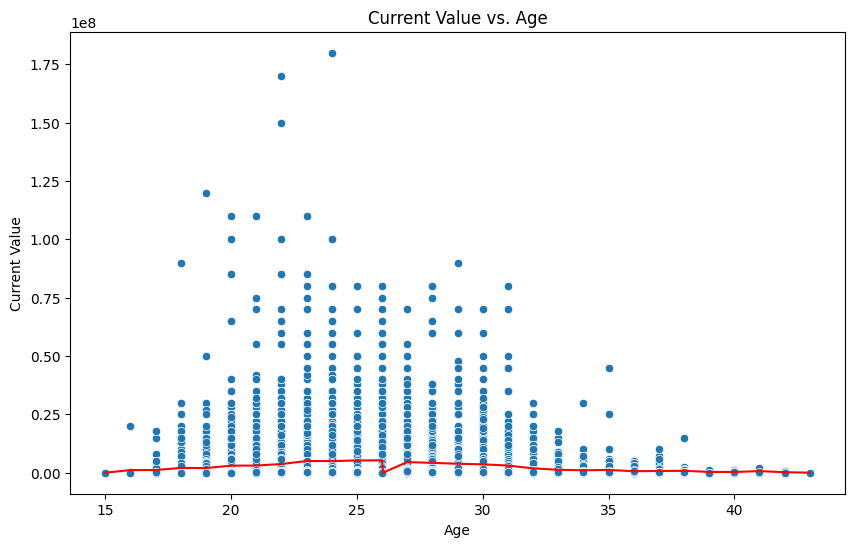

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dfData.loc[:,'age'], y=dfData.loc[:,'current_value'])
sns.lineplot(x=dfData.loc[:,'age'], y=dfData.loc[:,'current_value'], errorbar=None, estimator='mean', color='red')
plt.title("Current Value vs. Age")
plt.xlabel("Age")
plt.ylabel("Current Value")
plt.show()


Correlation not as easily visible from scatterplot, refer to barplot below.

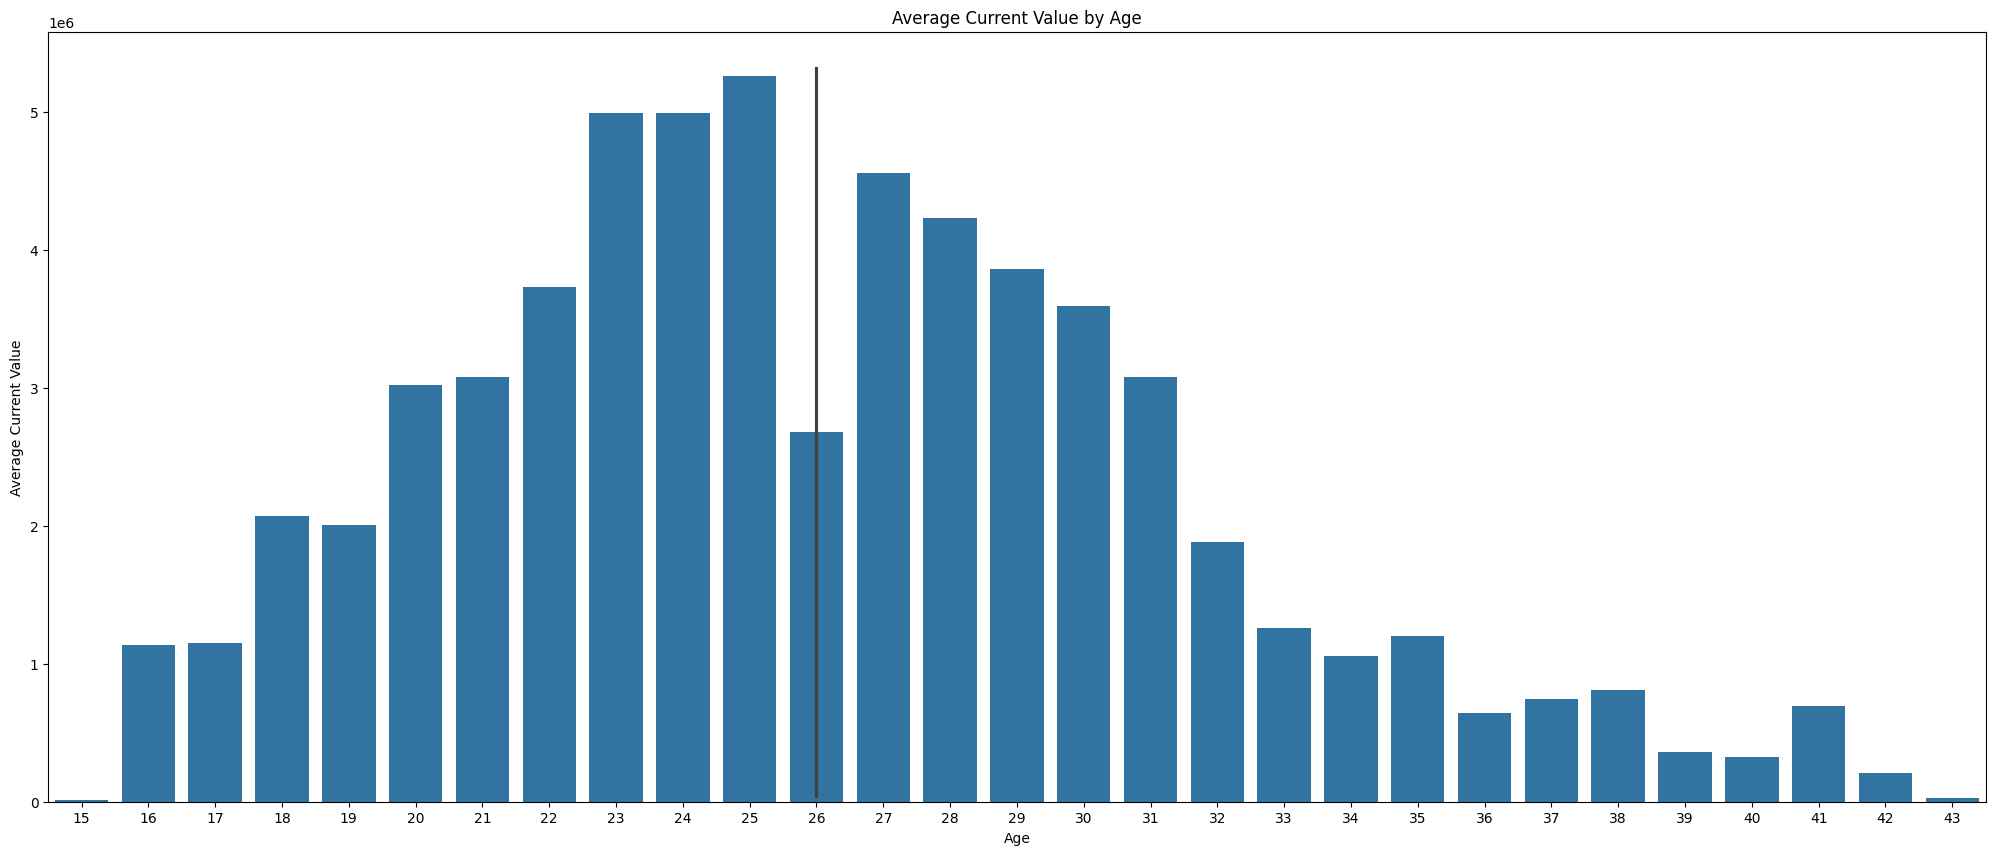

In [ ]:
avg_value_by_age = dfData.groupby('age')['current_value'].mean()

plt.figure(figsize=(25, 10))
sns.barplot(x=avg_value_by_age.index.astype(int), y=avg_value_by_age.values)
plt.title("Average Current Value by Age")
plt.xlabel("Age")
plt.ylabel("Average Current Value")
plt.show()

Plot is right-skewed, therefore younger players (and in general players in their 20s) are higher valued

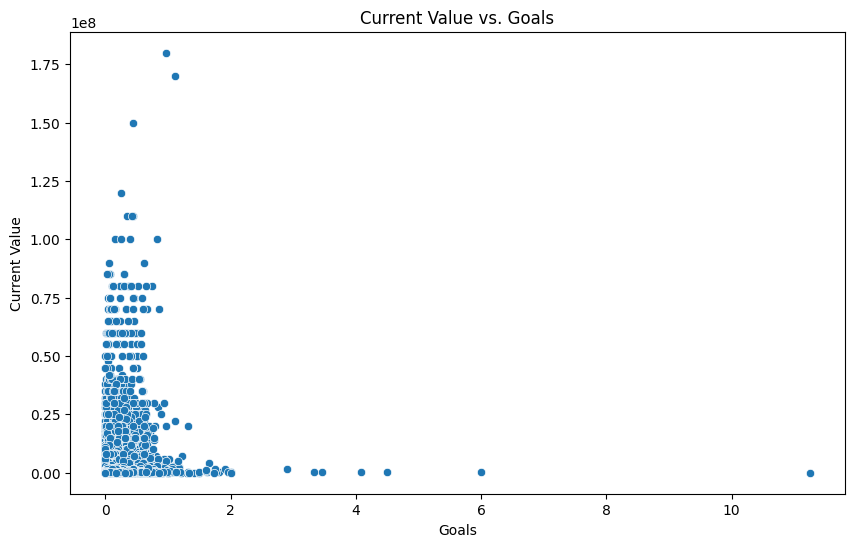

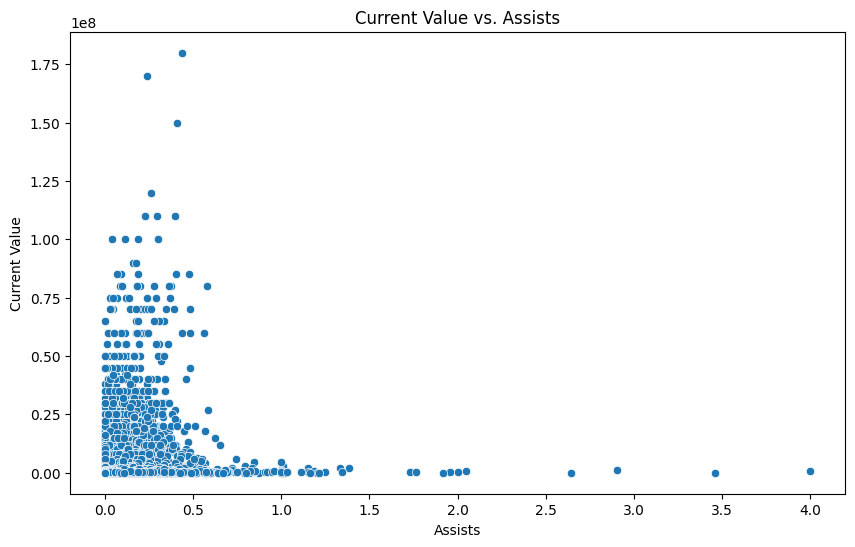

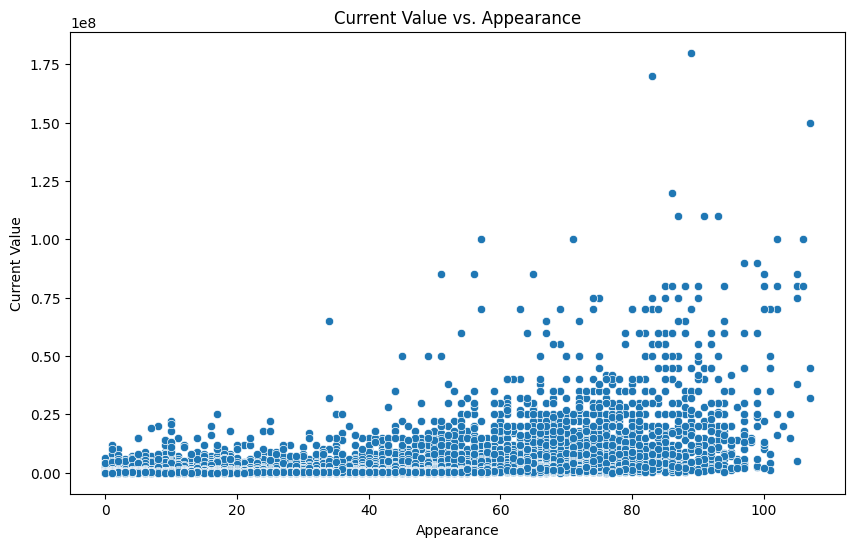

In [ ]:
# Scatter plots of performance metrics against current value
metrics = ['goals', 'assists', 'appearance'] # Use column names as strings


for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=dfData[metric], y=dfData['current_value']) # Access columns using strings
    plt.title(f"Current Value vs. {metric.capitalize()}")
    plt.xlabel(metric.capitalize())
    plt.ylabel("Current Value")
    plt.show()

Plot-points clustered around origin, potentially due to all goalkeepers having 0 value for goals and assists.

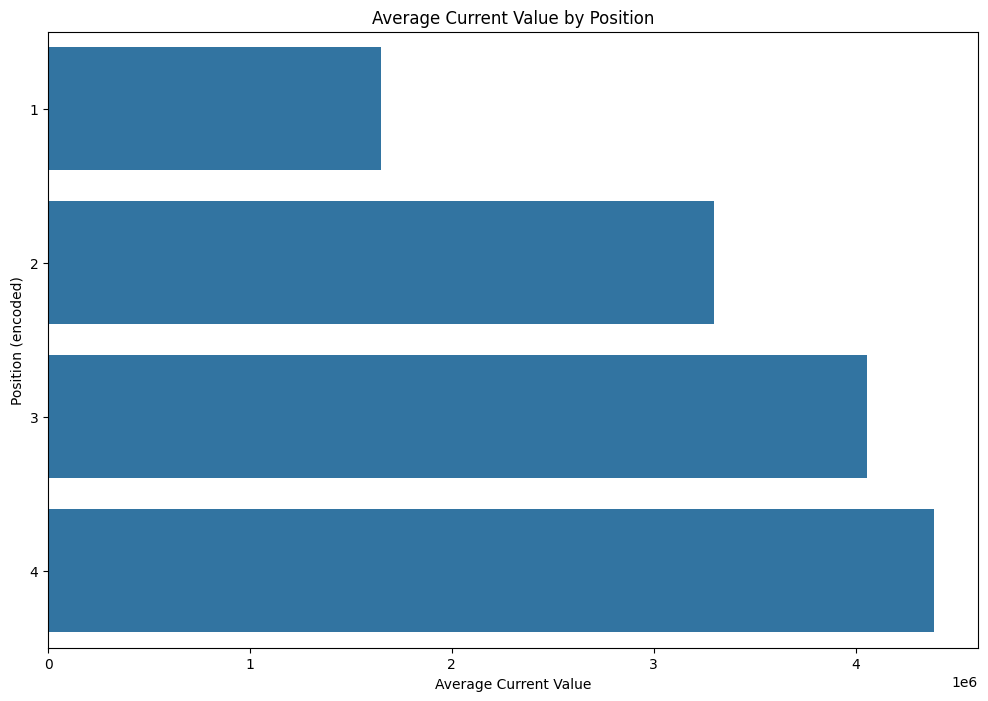

In [ ]:
# Calculate the average current value by position
avg_value_by_position = dfData.groupby('position_encoded')['current_value'].mean().sort_values(ascending=False)

# Plot the average current value by position
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_value_by_position.values, y=avg_value_by_position.index, orient='h')
plt.title("Average Current Value by Position")
plt.xlabel("Average Current Value")
plt.ylabel("Position (encoded)")
plt.show()

Goalkeepers are valued at lowest and players at position index 4 at highest, currently

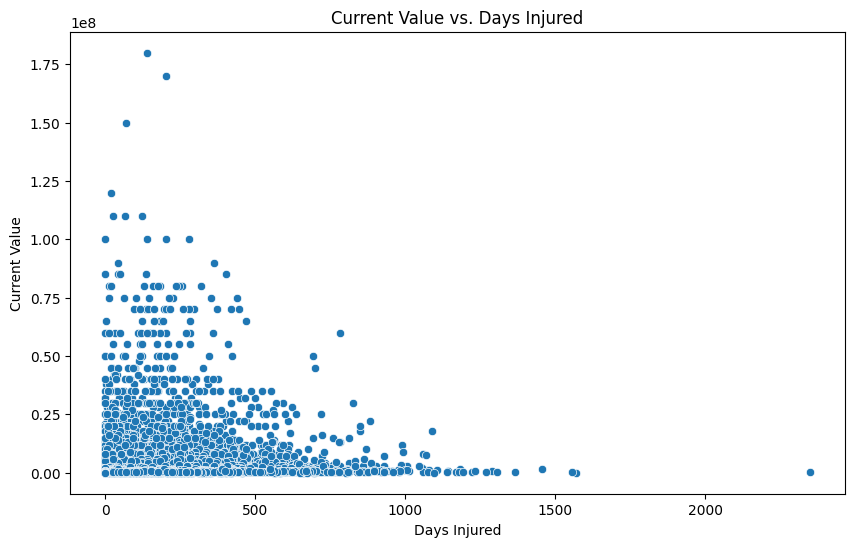

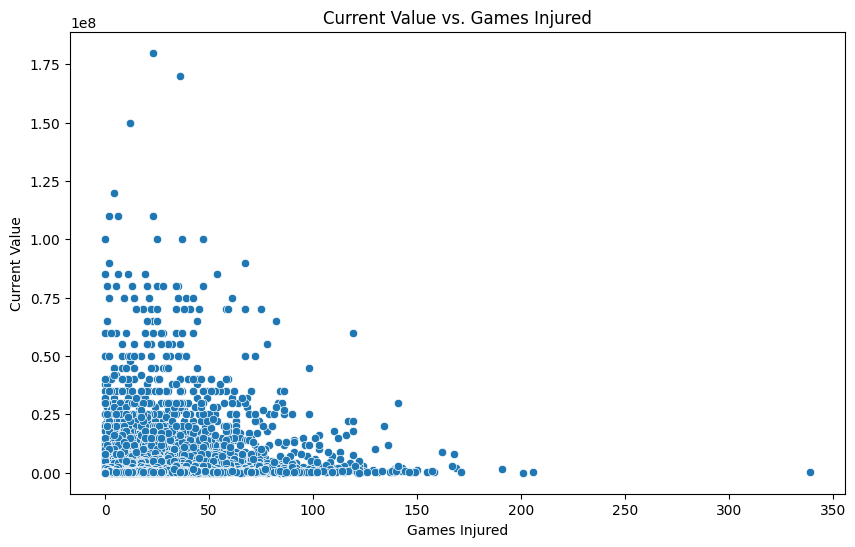

In [ ]:
# Scatter plot of current value vs. days injured
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dfData['days_injured'], y=dfData['current_value'])
plt.title("Current Value vs. Days Injured")
plt.xlabel("Days Injured")
plt.ylabel("Current Value")
plt.show()

# Scatter plot of current value vs. games injured
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dfData['games_injured'], y=dfData['current_value'])
plt.title("Current Value vs. Games Injured")
plt.xlabel("Games Injured")
plt.ylabel("Current Value")
plt.show()